In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("D:/ESAA/21-1/insurance/insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


sex, smoker, region object -> encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le1=LabelEncoder()
le1.fit(data.sex.drop_duplicates())
data.sex=le1.transform(data.sex)

le2=LabelEncoder()
le2.fit(data.smoker.drop_duplicates())
data.smoker=le2.transform(data.smoker)

le3=LabelEncoder()
le3.fit(data.region.drop_duplicates())
data.region=le3.transform(data.region)

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [9]:
print(le1.classes_)
print(le2.classes_)
print(le3.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


sex: female=0, male=1  
smoker: yes=1, no=0  
region: southwest=3, southeast=2, northwest=1, northeast=0 

In [10]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [11]:
data.corr()["charges"].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

charges 변수가 다른 변수와 가지는 상관계수  
smoker>age>bmi>children>sex>region

In [12]:
np.zeros_like(data.corr())

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [13]:
np.zeros_like(data.corr(), dtype=np.bool)
#0=False

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

<AxesSubplot:>

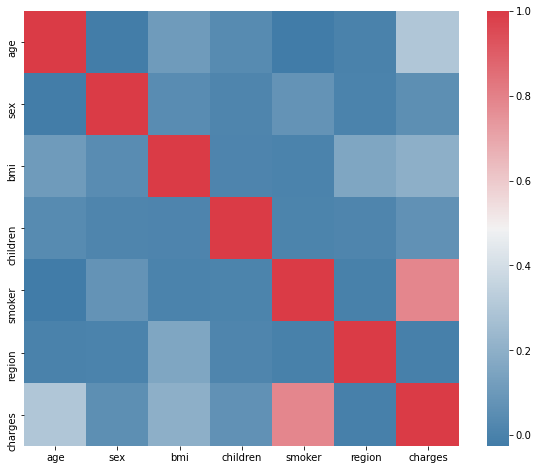

In [14]:
f, ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

__mask: data will not be shown in cells where mask is True  
=> 결국 모두 False이기 때문에 모든 cell 나타냄__
### ↪ 굳이 필요한 과정인가?

__square: If True, set the Axes aspect to “equal” so each cell will be square-shaped.
=> 모든 셀이 정사각형으로 나오도록__

<AxesSubplot:>

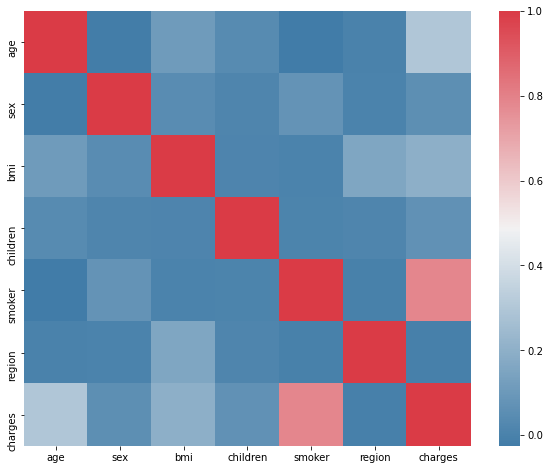

In [15]:
f, ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr, 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            ax=ax)

mask는 없어도 똑같고  
square은 없애면 가로로 더 길게 나옴 => 정사각형X

# Charges 분포

In [16]:
from bokeh.io import output_notebook, show #그림의 출력을 notebook 에서 하겠다
#from bokeh.plotting import figure
output_notebook()

import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file 
#모든 그림을 그리고 나면 show() 안에 figure 를 입력

Loading BokehJS ...

bokeh vs seaborn  
https://lovit.github.io/visualization/2019/11/22/bokeh_tutorial/  

scipy.special  
https://docs.scipy.org/doc/scipy/reference/special.html

In [17]:
p=figure(title="Distribution of Charges",
         tools="save", #Tools the plot should start with
         background_fill_color="#E8DDCB")

hist, edges=np.histogram(data.charges)

In [18]:
np.histogram(data.charges)

(array([536, 398, 129,  86,  35,  59,  57,  32,   2,   4], dtype=int64),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]))

hist: 범위에 해당되는 count 개수(y)  
edges: 범위(x)

In [19]:
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p.xaxis.axis_label="x"
p.yaxis.axis_label="Pr(x)"

In [20]:
print(edges)
print(edges[:-1]) #뒤에 한개 뺌
print(edges[1:]) #앞에 힌개 뺌

[ 1121.8739    7386.729311 13651.584722 19916.440133 26181.295544
 32446.150955 38711.006366 44975.861777 51240.717188 57505.572599
 63770.42801 ]
[ 1121.8739    7386.729311 13651.584722 19916.440133 26181.295544
 32446.150955 38711.006366 44975.861777 51240.717188 57505.572599]
[ 7386.729311 13651.584722 19916.440133 26181.295544 32446.150955
 38711.006366 44975.861777 51240.717188 57505.572599 63770.42801 ]


In [21]:
show(gridplot(p,ncols=1,plot_width=400,plot_height=400))

TypeError: 'Figure' object is not iterable

### ↪ 에러!  
gridplot 쓸거면 p가 list 형태이어야함

gridplot(children, sizing_mode=None, toolbar_location='above', ncols=None, plot_width=None, plot_height=None, toolbar_options=None, merge_tools=True)  
- children (list of lists of Plot): An array of plots to display in a grid, given as a list of lists of Plot objects. 
- ncols (int, optional): Specify the number of columns you would like in your grid. 

In [22]:
show(p)

In [23]:
show(gridplot([p],ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

# Smoker 별 Charges 분포

Text(0.5, 1.0, 'Distribution of Charges for Non-Smokers')

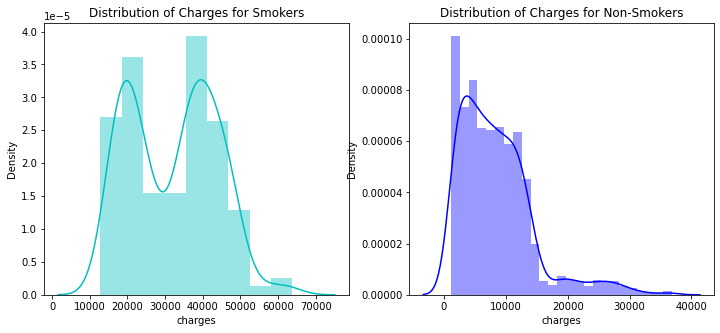

In [24]:
f=plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[data.smoker==1]["charges"], color="c", ax=ax)
ax.set_title("Distribution of Charges for Smokers")

ax=f.add_subplot(122)
sns.distplot(data[data.smoker==0]["charges"], color="b", ax=ax)
ax.set_title("Distribution of Charges for Non-Smokers")

Text(0.5, 1.0, 'Distribution of Charges for Non-Smokers')

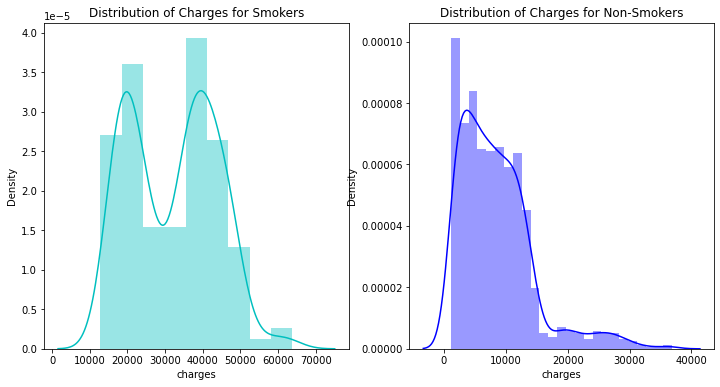

In [25]:
f, ax=plt.subplots(ncols=2, nrows=1, figsize=(12,6))

sns.distplot(data[data.smoker==1]["charges"], color="c", ax=ax[0])
ax[0].set_title("Distribution of Charges for Smokers")

sns.distplot(data[data.smoker==0]["charges"], color="b", ax=ax[1])
ax[1].set_title("Distribution of Charges for Non-Smokers")

smoker일경우에 charges값이 더 높음

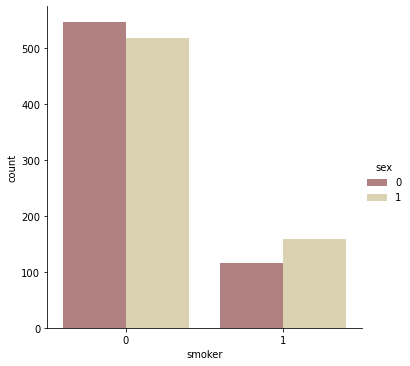

In [26]:
sns.catplot(x="smoker", kind="count", hue="sex", palette="pink", data=data)

smoker(1)가 non-smoker(0)보다 적음.  
non-smoker은 female(0)이 더 많고 smoker은 male(1)이 더 많음.  
### ↪여기 성별 kaggle이랑 반대로 되어있는데 확인!

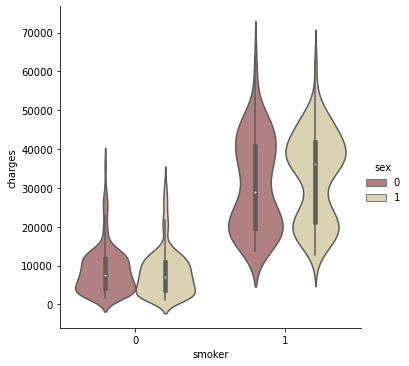

In [27]:
sns.catplot(x='smoker', y="charges", hue="sex", 
            kind="violin", palette="pink", data=data)

smoker(1)이 non-smoker(0)에 비해 charge가 높음.  
같은 흡연 그룹 내에선 female(0)이 charge가 높음.  

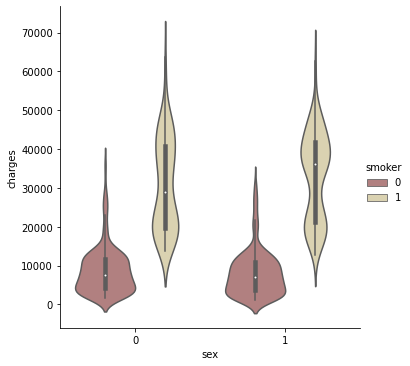

In [28]:
sns.catplot(x='sex', y="charges", hue="smoker", 
            kind="violin", palette="pink", data=data)

성별 무관하게 smoker(1)이 charge가 높음. 

<AxesSubplot:title={'center':'Boxplot for Charges of Female'}, xlabel='charges', ylabel='smoker'>

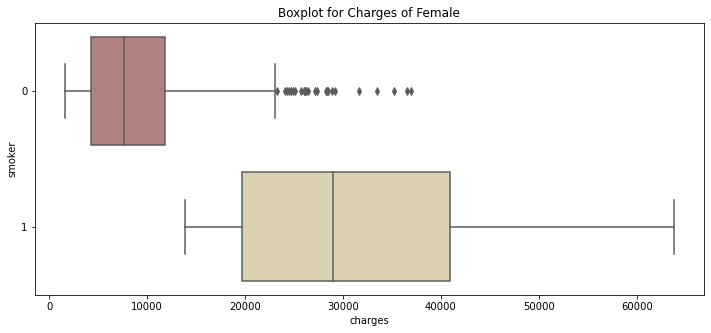

In [29]:
plt.figure(figsize=(12,5))
plt.title("Boxplot for Charges of Female")
sns.boxplot(y="smoker", x="charges", data=data[data.sex==0], 
            orient="h", palette="pink")

<AxesSubplot:title={'center':'Boxplot for Charges of Male'}, xlabel='charges', ylabel='smoker'>

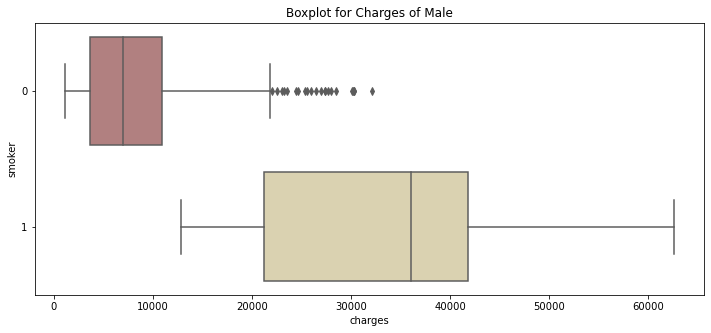

In [30]:
plt.figure(figsize=(12,5))
plt.title("Boxplot for Charges of Male")
sns.boxplot(y="smoker", x="charges", data=data[data.sex==1], 
            orient="h", palette="pink")

# Age 별 Charges 분포

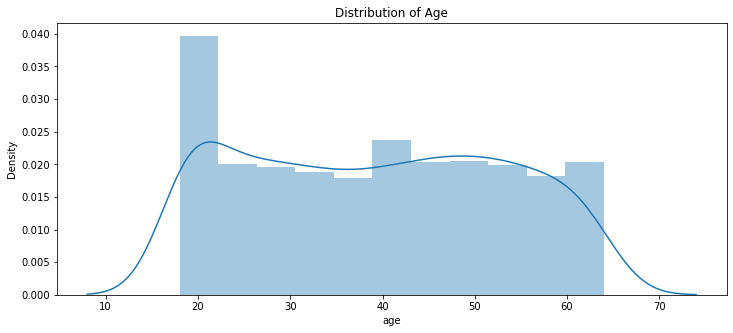

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Age")
ax=sns.distplot(data["age"])

Text(0.5, 1.0, '# of smokers/non-smokers (age 18)')

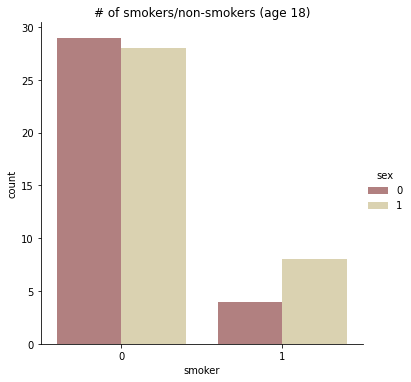

In [32]:
sns.catplot(x="smoker", kind="count", hue="sex", palette="pink",
            data=data[data.age==18])
plt.title("# of smokers/non-smokers (age 18)")

18살에 smoker(1) 존재하고 male(1)이 더 많음.  

<AxesSubplot:title={'center':'Boxplot for Charges of amokers(age 18)'}, xlabel='charges', ylabel='smoker'>

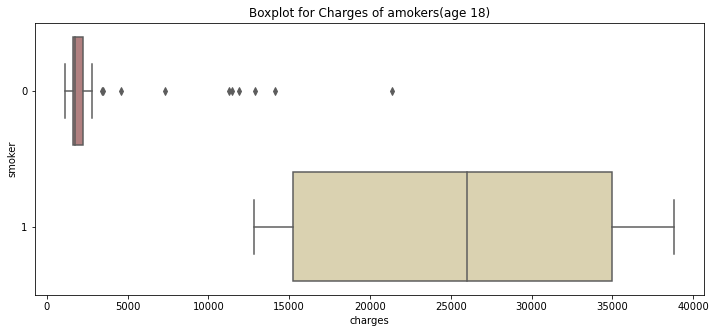

In [33]:
plt.figure(figsize=(12,5))
plt.title("Boxplot for Charges of amokers(age 18)")
sns.boxplot(y="smoker", x="charges", data=data[data.age==18], 
            orient="h", palette="pink")

smoke하는 경우에 charge가 엄청 증가함!!  

Text(0.5, 1.0, 'Disstribution of Charges and Age for Non-Smokers')

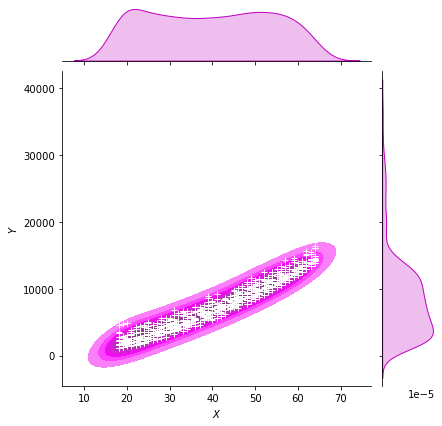

In [34]:
g=sns.jointplot(x="age", y="charges",
                data=data[data.smoker==0], kind="kde", color="m", fill=True)
#jointplot: 두개의 plot을 동시에 나타내줌

g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

ax.set_title("Disstribution of Charges and Age for Non-Smokers")

Text(0.5, 1.0, 'Disstribution of Charges and Age for Smokers')

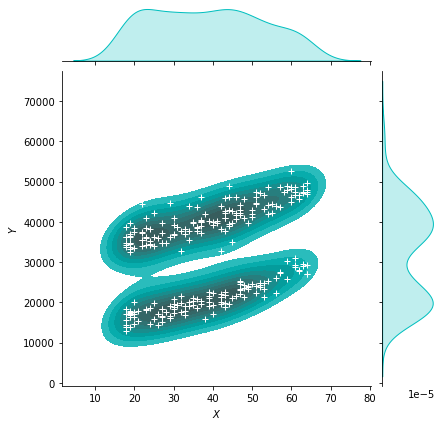

In [35]:
g=sns.jointplot(x="age", y="charges",
                data=data[data.smoker==1], kind="kde", color="c", fill=True)

g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

ax.set_title("Disstribution of Charges and Age for Smokers")

### ↪ sns 업데이트 되면서 _fill=True_ 추가해야됨!!

Text(0.5, 1.0, 'Disstribution of Charges and Age for Non-Smokers')

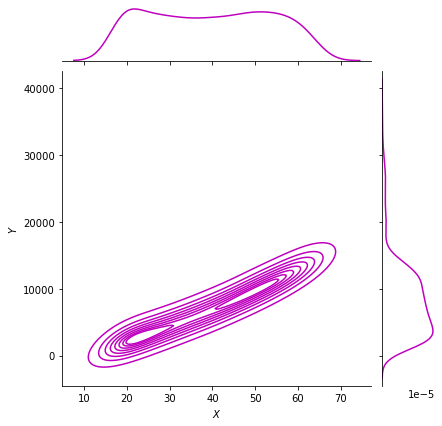

In [36]:
g=sns.jointplot(x="age", y="charges",
                data=data[data.smoker==0], kind="kde", color="m")
#jointplot: 두개의 plot을 동시에 나타내줌

g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

ax.set_title("Disstribution of Charges and Age for Non-Smokers")

In [38]:
p=figure(plot_width=500, plot_height=450)
p.circle(x=data[data.smoker==0].age, 
         y=data[data.smoker==0].charges, 
         size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)
show(p)

bokeh.plotting.Figure.circle: Configure and add Scatter glyphs to this Figure

In [40]:
p=figure(plot_width=500, plot_height=450)
p.circle(x=data[data.smoker==1].age, 
         y=data[data.smoker==1].charges, 
         size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)
show(p)

왜 가운데가 빌까?!  
캐글은 데이터가 이상한거라고 하는데,,  

Text(0.5, 1.0, 'Smokers and Non-Smokers')

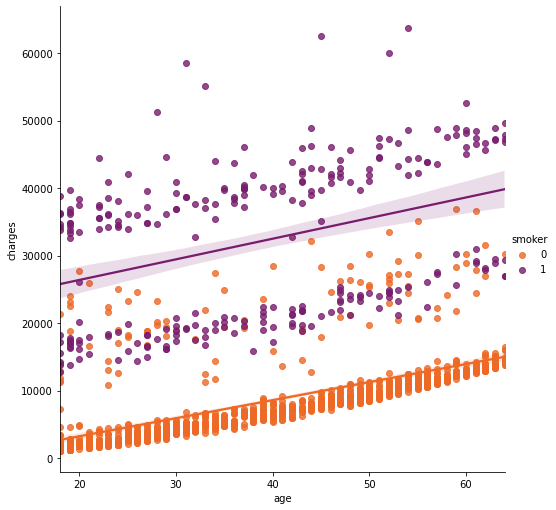

In [42]:
sns.lmplot(x="age", y="charges", hue="smoker", 
           data=data, palette="inferno_r", size=7)
ax.set_title("Smokers and Non-Smokers")

In [51]:
df1=data[(data.smoker==1)&(data.charges>30000)]
df2=data[(data.smoker==1)&(data.charges<=30000)]

In [52]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,152.000000,152.000000,152.000000,152.000000,152.0,152.000000,152.000000
mean,39.335526,0.644737,35.062730,1.125000,1.0,1.644737,41294.115057
std,14.260093,0.480175,4.647097,1.129452,0.0,1.057348,5955.650094
min,18.000000,0.000000,17.765000,0.000000,1.0,0.000000,30184.936700
25%,26.750000,0.000000,31.775000,0.000000,1.0,1.000000,36937.375795
50%,39.500000,1.000000,34.750000,1.000000,1.0,2.000000,40227.945750
75%,51.000000,1.000000,37.055000,2.000000,1.0,2.000000,44733.136925
max,64.000000,1.000000,52.580000,4.000000,1.0,3.000000,63770.428010


In [53]:
df2.describe()

,age,sex,bmi,children,smoker,region,charges
count,122.000000,122.000000,122.000000,122.000000,122.0,122.000000,122.000000
mean,37.491803,0.500000,25.283443,1.098361,1.0,1.344262,20533.262567
std,13.479857,0.502062,3.104577,1.195099,0.0,1.089169,3898.722807
min,18.000000,0.000000,17.195000,0.000000,1.0,0.000000,12829.455100
25%,27.000000,0.000000,23.250000,0.000000,1.0,0.000000,17512.324437
50%,37.000000,0.500000,25.650000,1.000000,1.0,1.000000,19949.102150
75%,47.750000,1.000000,27.883750,2.000000,1.0,2.000000,23291.107800
max,64.000000,1.000000,30.000000,5.000000,1.0,3.000000,29523.165600


돈 더 많이 내는 그룹(df1)은 덜 내는 그룹에 비해 bmi분포가 더 넓게 분포해있음. min, max 모두 더 양 극으로 감.   

# BMI별 Charges 분포

Text(0.5, 1.0, 'Distribution of BMI')

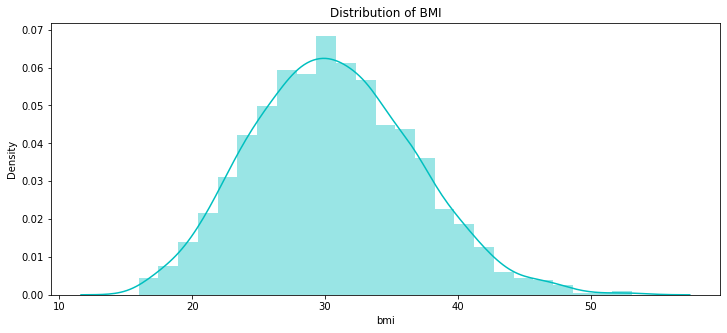

In [55]:
plt.figure(figsize=(12,5))
ax=sns.distplot(data["bmi"], color="c")
plt.title("Distribution of BMI")

In [56]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

### median 30을 기준으로 charges 확인

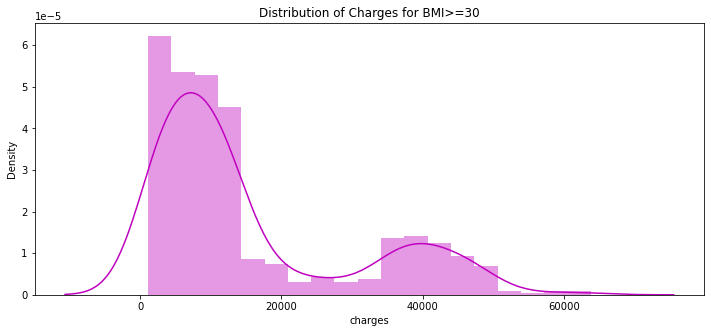

In [57]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Charges for BMI>=30")
ax=sns.distplot(data[data.bmi>=30].charges, color="m")

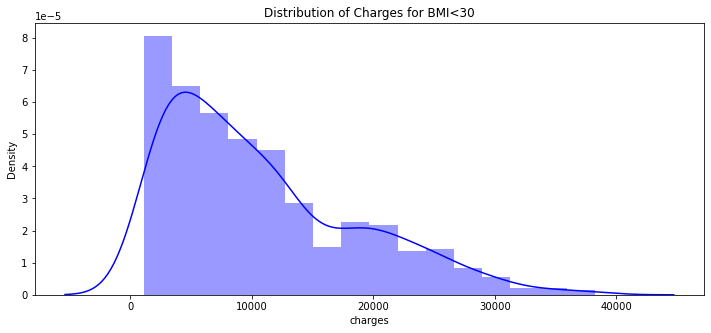

In [62]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Charges for BMI<30")
ax=sns.distplot(data[data.bmi<30].charges, color="b")

Text(0.5, 1.0, 'Disstribution of Charges and BMI')

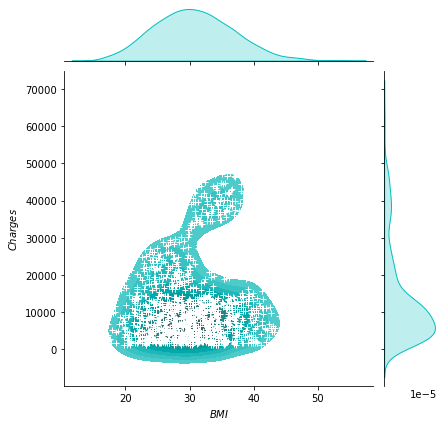

In [65]:
g=sns.jointplot(x="bmi", y="charges",
                data=data, kind="kde", color="c", fill=True)

g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$BMI$", "$Charges$")

ax.set_title("Disstribution of Charges and BMI")

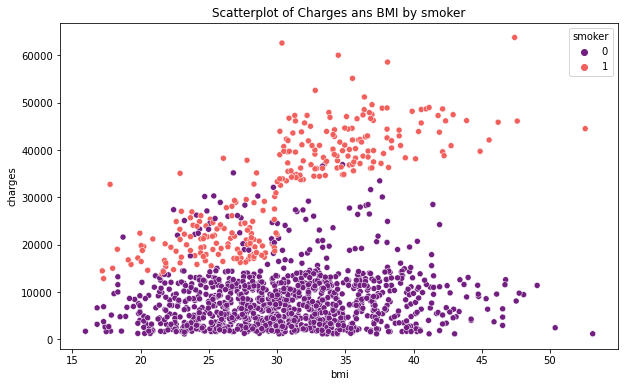

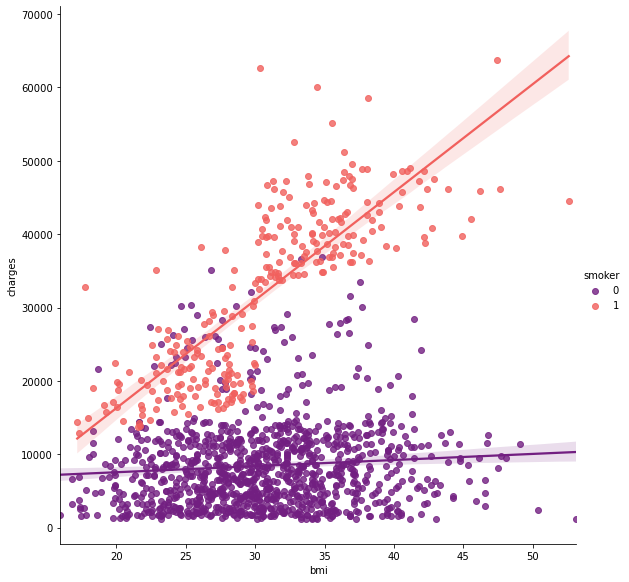

In [64]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(x="bmi", y="charges", hue="smoker", data=data,
                   palette="magma")
ax.set_title("Scatterplot of Charges ans BMI by smoker")

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data,
           palette="magma", size=8)

BMI보단 smoking 여부가 charges에 더 큰 영향인듯?!

# Children 별 Charges 분포

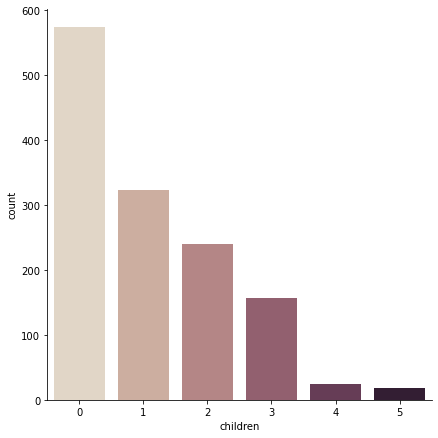

In [66]:
sns.catplot(x="children", data=data, 
            kind="count", palette="ch:.25", size=6)

Text(0.5, 1.0, 'Smokers & Non-Smokers with children')

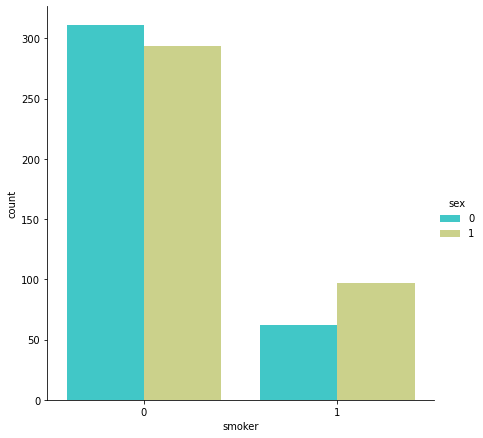

In [68]:
sns.catplot(x="smoker", hue="sex", data=data[data.children>0],
            kind="count", size=6, palette="rainbow")
ax.set_title("Smokers & Non-Smokers with children")

# modeling
### Predict the Cost of Treatment

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [75]:
x=data.drop(["charges"], axis=1)
y=data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr=LinearRegression()
lr.fit(x_train, y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print("Train Accuracy:",lr.score(x_train, y_train)) #R2 score
print("Test Accuracy:",lr.score(x_test, y_test)) 

Train Accuracy: 0.7337162219022217
Test Accuracy: 0.7962732059725786


In [89]:
print("Train Accuarcy:", r2_score(y_train, y_train_pred))
print("Test Accuracy:", r2_score(y_test, y_test_pred))

Train Accuarcy: 0.7337162219022217
Test Accuracy: 0.7962732059725786


In [91]:
X=data.drop(["charges","region"], axis=1)
Y=data.charges

quad=PolynomialFeatures(degree=2)
X_quad=quad.fit_transform(X)
#(x1, x2) -> (1, x1, x2, x1^2, x2^2, x1x2)

X_train, X_test, Y_train, Y_test = train_test_split(X_quad, Y, random_state=0)

lr=LinearRegression()
lr.fit(X_train, Y_train)

Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

print("Train Accuracy:",lr.score(X_train, Y_train)) #R2 score
print("Test Accuracy:",lr.score(X_test, Y_test)) 

Train Accuracy: 0.827971069017031
Test Accuracy: 0.884919734414724


In [92]:
rf=RandomForestRegressor(n_estimators=100,
                         criterion="mse",
                         random_state=0,
                         n_jobs=1)
rf.fit(x_train, y_train)
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)

print("MSE of train data: %.3f" %mean_squared_error(y_train, rf_train_pred))
print("MSE of test data: %.3f" %mean_squared_error(y_test, rf_test_pred))

print("R2 of train data: %.3f" %r2_score(y_train, rf_train_pred))
print("R2 of test data: %.3f" %r2_score(y_test, rf_test_pred))


MSE of train data: 3744526.416
MSE of test data: 20337176.372
R2 of train data: 0.974
R2 of test data: 0.871


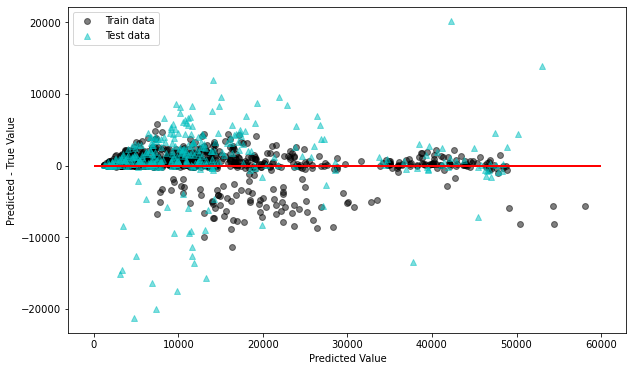

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(rf_train_pred, rf_train_pred-y_train,
            c="black", marker="o", s=35, alpha=0.5,
            label="Train data")
plt.scatter(rf_test_pred, rf_test_pred-y_test,
            c="c", marker="^", s=35, alpha=0.5, 
            label="Test data")
plt.xlabel("Predicted Value")
plt.ylabel("Predicted - True Value")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=60000, 
           lw=2, color="red")
plt.show()